<a href="https://colab.research.google.com/github/yongcito/CBNU_AI/blob/main/CNN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

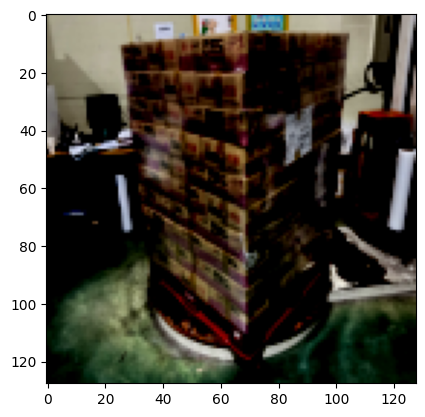

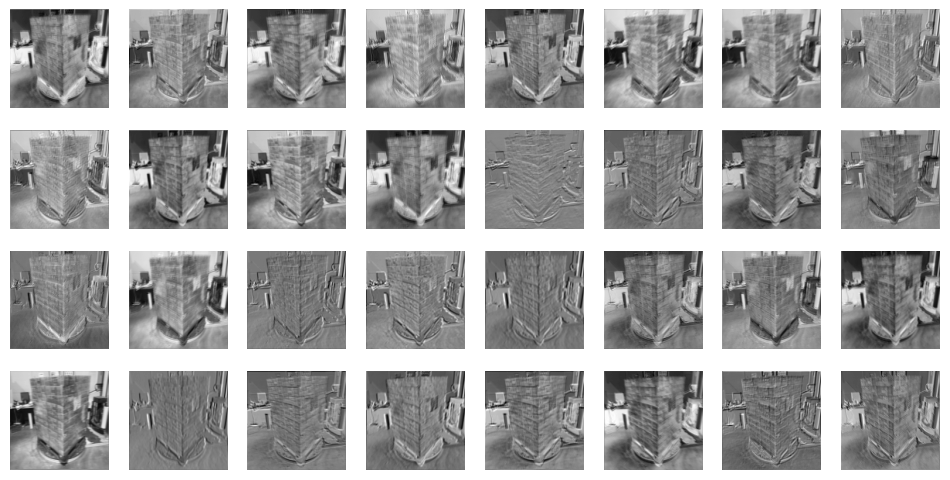

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt

# 장치 설정 (GPU 사용 가능 여부 확인)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, len(class_names))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        conv1_out = x
        x = self.pool(self.relu(x))
        x = self.conv2(x)
        x = self.pool(self.relu(x))
        x = x.view(-1, 64 * 32 * 32)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return conv1_out, x

model = SimpleCNN()
model.to(device)

# 하나의 이미지를 선택 (여기서는 첫 번째 이미지를 사용)
data_iter = iter(train_loader)
images, labels = next(data_iter)
image = images[0]

# 이미지 시각화
plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
plt.show()

# 이미지 입력
image = image.unsqueeze(0).to(device)  # 배치 차원을 추가
conv1_out, _ = model(image)

# conv1_out 시각화
conv1_out = conv1_out.squeeze(0)  # 배치 차원 제거

# conv1 필터 출력 시각화
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < 32:
        ax.imshow(conv1_out[i].detach().cpu().numpy(), cmap='gray')
        ax.axis('off')
plt.show()


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os

# 데이터 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 데이터셋 경로
data_dir = '/content/drive/My Drive/Colab Notebooks/img'

# 전체 데이터셋 로드
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# 데이터셋 분할 비율 설정 (예: 80% 훈련, 20% 테스트)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# 훈련 및 테스트 세트로 분할
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 클래스 이름 확인
class_names = full_dataset.classes
print(f"클래스 이름: {class_names}")


클래스 이름: ['grape', 'peach', 'whelk']


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os

# 데이터 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 데이터셋 경로
data_dir = '/content/drive/My Drive/Colab Notebooks/img'

# 전체 데이터셋 로드
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# 데이터셋 분할 비율 설정 (예: 80% 훈련, 20% 테스트)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# 훈련 및 테스트 세트로 분할
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 클래스 이름 확인
class_names = full_dataset.classes
print(f"클래스 이름: {class_names}")


클래스 이름: ['grape', 'peach', 'whelk']


In [ ]:
import torch.nn as nn
import torch.optim as optim

# 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, len(class_names))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(self.relu(x))
        x = self.conv2(x)
        x = self.pool(self.relu(x))
        x = x.view(-1, 64 * 32 * 32)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN()
model.to(device)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

Epoch 1/25
Train Loss: 3.7314, Train Acc: 0.3589
Test Loss: 2.4476, Test Acc: 0.3387
Epoch 2/25
Train Loss: 1.4299, Train Acc: 0.4032
Test Loss: 1.0566, Test Acc: 0.3710
Epoch 3/25
Train Loss: 1.0508, Train Acc: 0.3952
Test Loss: 1.0619, Test Acc: 0.3871
Epoch 4/25
Train Loss: 1.0475, Train Acc: 0.4153
Test Loss: 1.0095, Test Acc: 0.3710
Epoch 5/25
Train Loss: 0.9822, Train Acc: 0.3871
Test Loss: 0.9222, Test Acc: 0.4032
Epoch 6/25
Train Loss: 0.8728, Train Acc: 0.5444
Test Loss: 0.7882, Test Acc: 0.5645
Epoch 7/25
Train Loss: 0.7174, Train Acc: 0.7097
Test Loss: 0.6411, Test Acc: 0.7097
Epoch 8/25
Train Loss: 0.5242, Train Acc: 0.8306
Test Loss: 0.4934, Test Acc: 0.7419
Epoch 9/25
Train Loss: 0.3857, Train Acc: 0.8629
Test Loss: 0.3852, Test Acc: 0.7903
Epoch 10/25
Train Loss: 0.3278, Train Acc: 0.8387
Test Loss: 0.3705, Test Acc: 0.7903
Epoch 11/25
Train Loss: 0.3105, Train Acc: 0.8710
Test Loss: 0.3680, Test Acc: 0.8065
Epoch 12/25
Train Loss: 0.2479, Train Acc: 0.8710
Test Loss: 0.

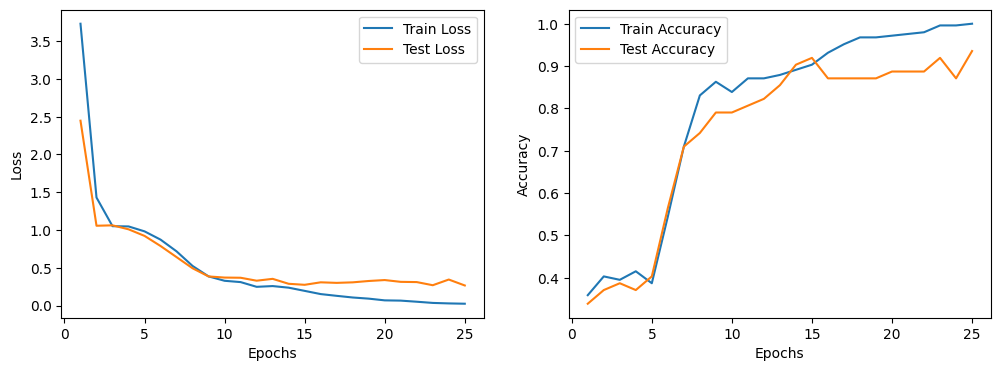

In [ ]:
import numpy as np

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 함수 정의
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

# 검증 함수 정의
def validate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

# 학습 및 검증 루프
num_epochs = 25
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []  # 수정된 부분

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_acc = validate(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# 학습 및 검증 결과 시각화
epochs = range(1, num_epochs+1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/new_images'))


# 새로운 이미지가 저장된 디렉토리 경로
new_images_dir = '/content/drive/My Drive/Colab Notebooks/new_images'

# 디렉토리 내 모든 파일명 가져오기
file_names = os.listdir(new_images_dir)

# 파일명 출력
print("Files in the directory:")
for file_name in file_names:
    print(file_name)


['429747B7-6A25-46BB-875A-513394EB3601.jpg', '8F5C98D4-D288-4489-902F-47627930F93E.jpg', '6E47097A-1DFC-41F8-A4D8-D4274B15FD06.jpg', '9CB3C6BC-CC35-460E-A86E-55E6B2665C63.jpg', 'B31971AF-EDFE-443A-B8A6-B3C55EB43CA5.jpg', 'D1E0539A-C0F5-43C0-8033-426D4C50D5E0.jpg', 'BB415631-C81A-404C-BA7D-807B0AA3638E.jpg', '860313D6-F703-4849-A996-0964D25FC314.jpg', 'B15918BC-FDD4-456B-81D2-4418D22F6BC5.jpg']
Files in the directory:
429747B7-6A25-46BB-875A-513394EB3601.jpg
8F5C98D4-D288-4489-902F-47627930F93E.jpg
6E47097A-1DFC-41F8-A4D8-D4274B15FD06.jpg
9CB3C6BC-CC35-460E-A86E-55E6B2665C63.jpg
B31971AF-EDFE-443A-B8A6-B3C55EB43CA5.jpg
D1E0539A-C0F5-43C0-8033-426D4C50D5E0.jpg
BB415631-C81A-404C-BA7D-807B0AA3638E.jpg
860313D6-F703-4849-A996-0964D25FC314.jpg
B15918BC-FDD4-456B-81D2-4418D22F6BC5.jpg


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# 전처리 파이프라인 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 예측 함수 정의
def predict_image(model, image_path, transform, class_names, device):
    # 이미지 로드 및 전처리
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    # 모델을 평가 모드로 전환
    model.eval()

    # 예측
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # 예측된 클래스 반환
    return class_names[predicted.item()]

# 학습된 모델 로드 (이 부분은 학습된 모델의 경로를 지정해야 합니다)
model_path = '/path/to/saved_model.pth'
model = torch.load(model_path)
model.to(device)

# 클래스 이름 정의 (이 부분은 실제 클래스 이름으로 변경해야 합니다)
class_names = ['grape', 'peach', 'whelk']

# 새로운 이미지가 저장된 디렉토리 경로
new_images_dir = '/content/drive/My Drive/Colab Notebooks/new_images'

# 디렉토리 내 모든 이미지 파일 경로 가져오기
new_image_paths = [os.path.join(new_images_dir, filename) for filename in os.listdir(new_images_dir) if filename.endswith(('jpg', 'jpeg', 'png'))]

# 각 이미지에 대해 예측 및 결과 출력
for image_path in new_image_paths:
    # 이미지 예측
    predicted_class = predict_image(model, image_path, transform, class_names, device)

    # 이미지 출력
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')
    plt.show()
    print(f"Predicted class for {os.path.basename(image_path)}: {predicted_class}")


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/saved_model.pth'